In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [274]:
train_data=pd.read_table("zhengqi_train.txt",sep="\t")
train_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [275]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
V0        2888 non-null float64
V1        2888 non-null float64
V2        2888 non-null float64
V3        2888 non-null float64
V4        2888 non-null float64
V5        2888 non-null float64
V6        2888 non-null float64
V7        2888 non-null float64
V8        2888 non-null float64
V9        2888 non-null float64
V10       2888 non-null float64
V11       2888 non-null float64
V12       2888 non-null float64
V13       2888 non-null float64
V14       2888 non-null float64
V15       2888 non-null float64
V16       2888 non-null float64
V17       2888 non-null float64
V18       2888 non-null float64
V19       2888 non-null float64
V20       2888 non-null float64
V21       2888 non-null float64
V22       2888 non-null float64
V23       2888 non-null float64
V24       2888 non-null float64
V25       2888 non-null float64
V26       2888 non-null float64
V27       2888 non-null float

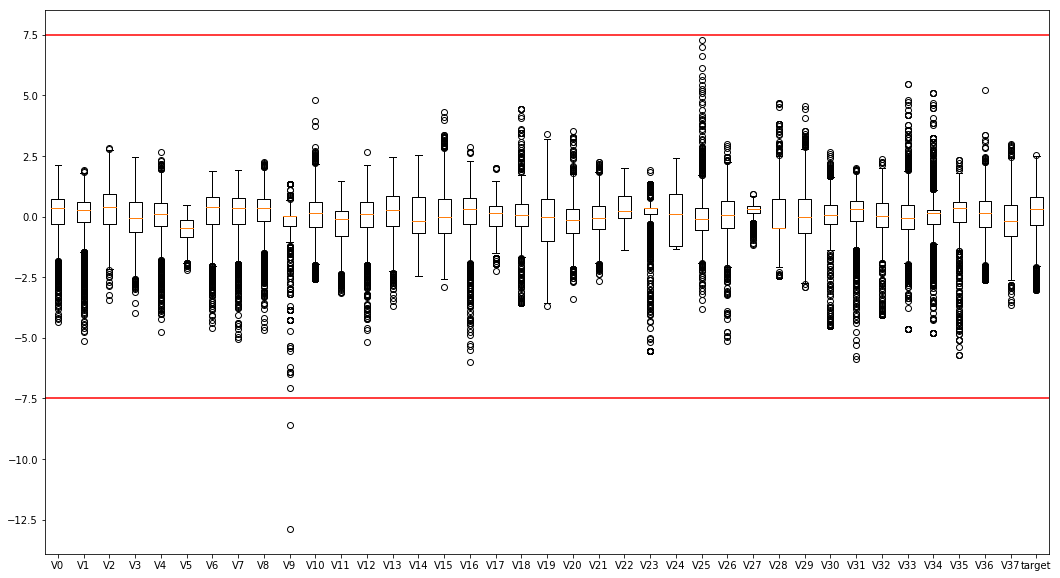

In [276]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

In [277]:
train_data=train_data[train_data['V9']>-7.5]
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [278]:
# def outlier_std(df, thresh=3, columns=None):
#     if columns == None:
#         columns = df.columns

#     for col in columns:
#         mean = df[col].mean()
#         std = df[col].std()
        
#         # 平均値から標準偏差の何倍離れているかを計算
#         border = (np.abs(df[col] - mean)) / std
        
#         # 標準偏差の3倍以上離れているデータを除外
#         df = df[(border < thresh)]
        
#     return df
# def outlier_iqr(df, columns=None):
#     if columns == None:
#         columns = df.columns

#     for col in columns:
#         q1 = df[col].describe()['25%']
#         q3 = df[col].describe()['75%']
#         #四分位範囲
#         iqr = q3 - q1 
        
#         outlier_min = q1 - iqr * 1.5
#         outlier_max = q3 + iqr * 1.5

#         # 範囲から外れている値を除く
#         df = df[(df[col] >= outlier_min) & (df[col] <= outlier_max)]
        
#     return df

# print("before", train_data.shape)
# for i in train_data.columns:
#     train_data = outlier_iqr(train_data,[i] )
# #train_data = outlier_iqr(train_data,["V0"] )

# print("after", train_data.shape)

In [279]:
train_data.corr()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908566,0.463302,0.410520,0.782754,-0.326440,0.188990,0.141253,0.794264,0.073466,...,0.303253,0.154722,0.675522,0.048020,0.056002,-0.019514,0.138491,0.232515,-0.493494,0.873294
V1,0.908566,1.000000,0.506259,0.385098,0.659215,-0.226428,0.276666,0.205090,0.875248,0.136703,...,0.148433,0.173418,0.770532,0.082463,0.034656,-0.029159,0.146117,0.236881,-0.493305,0.871718
V2,0.463302,0.506259,1.000000,0.410944,0.058644,-0.321993,0.615796,0.477138,0.703426,0.041900,...,-0.275643,0.174113,0.654191,0.031101,0.049850,-0.025985,0.042766,0.317218,-0.735008,0.638896
V3,0.410520,0.385098,0.410944,1.000000,0.314930,-0.207237,0.234276,0.197955,0.412283,-0.060399,...,0.116976,0.047372,0.421890,-0.090420,-0.006800,-0.031862,0.080514,0.324074,-0.231483,0.513974
V4,0.782754,0.659215,0.058644,0.314930,1.000000,-0.234802,-0.116929,-0.052118,0.450757,-0.023049,...,0.660151,0.026834,0.447235,-0.022978,0.063044,0.029437,0.101851,0.114106,-0.032842,0.605749
V5,-0.326440,-0.226428,-0.321993,-0.207237,-0.234802,1.000000,-0.028665,0.081182,-0.182265,0.049041,...,-0.177072,-0.070933,-0.121624,-0.058797,-0.132342,-0.105828,-0.074833,0.025549,0.403929,-0.313666
V6,0.188990,0.276666,0.615796,0.234276,-0.116929,-0.028665,1.000000,0.917554,0.468054,0.466106,...,-0.468338,0.188514,0.546732,0.143720,0.053904,-0.003255,0.044250,0.434250,-0.404691,0.370111
V7,0.141253,0.205090,0.477138,0.197955,-0.052118,0.081182,0.917554,1.000000,0.389922,0.465994,...,-0.311667,0.170994,0.475298,0.123016,0.034402,-0.019270,0.110934,0.340679,-0.292553,0.288109
V8,0.794264,0.875248,0.703426,0.412283,0.450757,-0.182265,0.468054,0.389922,1.000000,0.100729,...,-0.011356,0.150031,0.878327,0.037281,0.026562,-0.036760,0.178452,0.326575,-0.553564,0.832983
V9,0.073466,0.136703,0.041900,-0.060399,-0.023049,0.049041,0.466106,0.465994,0.100729,1.000000,...,-0.227282,0.268883,0.129574,0.269285,0.115463,0.095359,0.137666,0.140209,-0.099535,0.135018


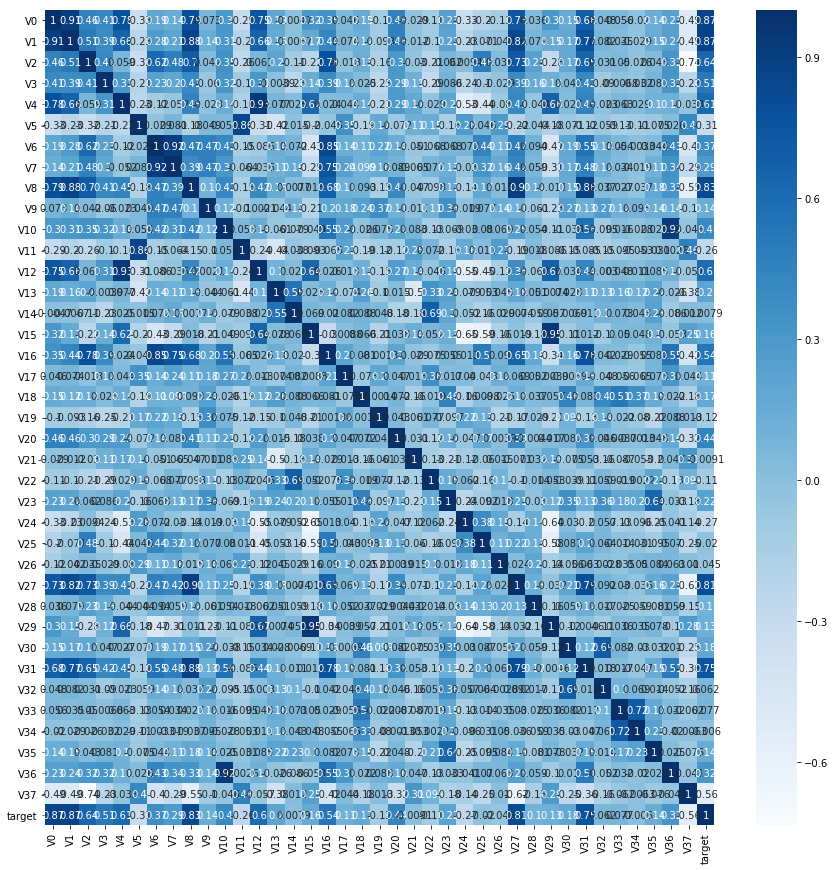

In [280]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True,cmap="Blues")

In [281]:
from sklearn.model_selection import train_test_split
X=train_data.drop(columns=["target"])
y=train_data["target"]
print(X.shape)
print(y.shape)

(2886, 38)
(2886,)


In [282]:
#from sklearn.decomposition import PCA

#pca = PCA()

#X= pca.fit_transform(X)
#X

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)

(2308, 38)
(578, 38)


In [284]:
params = {
    'silent': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'exact',
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'predictor': 'cpu_predictor'
}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  evals=[(dtest, 'test')])

[0]	test-rmse:1.01644
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:0.935598
[2]	test-rmse:0.865997
[3]	test-rmse:0.802725
[4]	test-rmse:0.747001
[5]	test-rmse:0.696651
[6]	test-rmse:0.653759
[7]	test-rmse:0.616308
[8]	test-rmse:0.583252
[9]	test-rmse:0.553883
[10]	test-rmse:0.52748
[11]	test-rmse:0.503778
[12]	test-rmse:0.481499
[13]	test-rmse:0.463498
[14]	test-rmse:0.449704
[15]	test-rmse:0.435626
[16]	test-rmse:0.423754
[17]	test-rmse:0.415333
[18]	test-rmse:0.406057
[19]	test-rmse:0.399671
[20]	test-rmse:0.393443
[21]	test-rmse:0.388126
[22]	test-rmse:0.383052
[23]	test-rmse:0.379671
[24]	test-rmse:0.375656
[25]	test-rmse:0.372154
[26]	test-rmse:0.368958
[27]	test-rmse:0.36695
[28]	test-rmse:0.364842
[29]	test-rmse:0.363086
[30]	test-rmse:0.362033
[31]	test-rmse:0.36057
[32]	test-rmse:0.358956
[33]	test-rmse:0.357401
[34]	test-rmse:0.356855
[35]	test-rmse:0.355804
[36]	test-rmse:0.355608
[37]	test-rmse:0.354741
[38]	test-rmse:0.354237
[39]	test-rmse:0.35345

In [285]:
gridsearch_params = [
    (max_depth, eta)
    for max_depth in [6, 7, 8]
    for eta in [0.1, 0.05, 0.01]
]
gridsearch_params

[(6, 0.1),
 (6, 0.05),
 (6, 0.01),
 (7, 0.1),
 (7, 0.05),
 (7, 0.01),
 (8, 0.1),
 (8, 0.05),
 (8, 0.01)]

In [286]:
cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=10,
        seed=0,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=5
    )
cv_results

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,0.950751,0.028310,0.946499,0.006965
1,0.875597,0.026802,0.865915,0.006270
2,0.810639,0.026453,0.793717,0.005716
3,0.752379,0.026148,0.728933,0.005274
4,0.701259,0.024288,0.670864,0.004637
5,0.655707,0.024300,0.618658,0.004227
6,0.616388,0.023471,0.571940,0.003579
7,0.581373,0.021824,0.529803,0.003312
8,0.550916,0.019942,0.492110,0.002639
9,0.524643,0.019096,0.458505,0.002050


In [287]:
min_rmse = float('Inf')
best_param = []

for max_depth, eta in gridsearch_params:
    print('max_depth={}, eta={}'.format(max_depth, eta))
    
    params['max_depth'] = max_depth
    params['eta'] = eta
    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=0,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=5
    )
    
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print('RMSE {} for {} rounds'.format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_param = (max_depth, eta)
    
print('Best params {}, RMSE {}'.format(best_param, min_rmse))


max_depth=6, eta=0.1


C:\Users\趙友\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


RMSE 0.3514202 for 87 rounds
max_depth=6, eta=0.05
RMSE 0.34808500000000003 for 179 rounds
max_depth=6, eta=0.01
RMSE 0.346796 for 847 rounds
max_depth=7, eta=0.1
RMSE 0.35666220000000004 for 121 rounds
max_depth=7, eta=0.05
RMSE 0.35049280000000005 for 200 rounds
max_depth=7, eta=0.01
RMSE 0.35419159999999994 for 999 rounds
max_depth=8, eta=0.1
RMSE 0.36046680000000003 for 111 rounds
max_depth=8, eta=0.05
RMSE 0.3601014 for 300 rounds
max_depth=8, eta=0.01
RMSE 0.3628058 for 998 rounds
Best params (6, 0.01), RMSE 0.346796


In [288]:
params["max_depth"]=6
params["eta"]=0.01
model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  evals=[(dtest, 'test')])

[0]	test-rmse:1.09828
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:1.08925
[2]	test-rmse:1.08027
[3]	test-rmse:1.0716
[4]	test-rmse:1.06283
[5]	test-rmse:1.05419
[6]	test-rmse:1.04577
[7]	test-rmse:1.03735
[8]	test-rmse:1.02902
[9]	test-rmse:1.02102
[10]	test-rmse:1.01281
[11]	test-rmse:1.00469
[12]	test-rmse:0.996914
[13]	test-rmse:0.988918
[14]	test-rmse:0.98113
[15]	test-rmse:0.973249
[16]	test-rmse:0.965834
[17]	test-rmse:0.95822
[18]	test-rmse:0.950877
[19]	test-rmse:0.943516
[20]	test-rmse:0.93627
[21]	test-rmse:0.928943
[22]	test-rmse:0.921933
[23]	test-rmse:0.915093
[24]	test-rmse:0.908263
[25]	test-rmse:0.901535
[26]	test-rmse:0.894811
[27]	test-rmse:0.888259
[28]	test-rmse:0.881739
[29]	test-rmse:0.875276
[30]	test-rmse:0.868987
[31]	test-rmse:0.862634
[32]	test-rmse:0.856424
[33]	test-rmse:0.850191
[34]	test-rmse:0.843785
[35]	test-rmse:0.837725
[36]	test-rmse:0.831436
[37]	test-rmse:0.825554
[38]	test-rmse:0.819756
[39]	test-rmse:0.814055
[40]	test-

[332]	test-rmse:0.356851
[333]	test-rmse:0.356737
[334]	test-rmse:0.356643
[335]	test-rmse:0.35652
[336]	test-rmse:0.356385
[337]	test-rmse:0.35618
[338]	test-rmse:0.356039
[339]	test-rmse:0.355938
[340]	test-rmse:0.35584
[341]	test-rmse:0.355775
[342]	test-rmse:0.355666
[343]	test-rmse:0.355527
[344]	test-rmse:0.355418
[345]	test-rmse:0.355351
[346]	test-rmse:0.355178
[347]	test-rmse:0.355022
[348]	test-rmse:0.354907
[349]	test-rmse:0.354794
[350]	test-rmse:0.354662
[351]	test-rmse:0.354536
[352]	test-rmse:0.354452
[353]	test-rmse:0.354293
[354]	test-rmse:0.35417
[355]	test-rmse:0.354084
[356]	test-rmse:0.354026
[357]	test-rmse:0.353916
[358]	test-rmse:0.35376
[359]	test-rmse:0.353665
[360]	test-rmse:0.353558
[361]	test-rmse:0.35341
[362]	test-rmse:0.353319
[363]	test-rmse:0.353211
[364]	test-rmse:0.353073
[365]	test-rmse:0.352954
[366]	test-rmse:0.352813
[367]	test-rmse:0.352692
[368]	test-rmse:0.352587
[369]	test-rmse:0.352474
[370]	test-rmse:0.352353
[371]	test-rmse:0.352284
[372]	

[662]	test-rmse:0.342098
[663]	test-rmse:0.342117
[664]	test-rmse:0.342105
[665]	test-rmse:0.342101
[666]	test-rmse:0.342093
Stopping. Best iteration:
[661]	test-rmse:0.342082



In [289]:
X_test

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
2695,0.670,0.572,0.654,-0.390,0.159,-0.132,0.479,0.001,0.890,0.042,...,-0.455,0.129,-0.516,0.695,0.056,0.419,0.160,0.364,0.629,-0.393
791,1.087,0.822,1.695,1.425,0.516,-1.262,1.096,1.097,1.122,0.473,...,1.117,0.641,1.128,0.706,0.565,2.469,1.608,-0.349,-0.544,-1.101
227,0.696,0.411,1.500,1.817,0.001,-1.790,1.098,0.257,0.682,0.042,...,-0.452,0.048,0.881,0.488,0.913,0.534,0.835,0.839,0.682,-1.336
2673,0.704,0.516,-0.189,-1.164,0.550,-0.613,-0.109,-0.078,0.229,0.042,...,-0.457,0.977,-0.527,0.280,-0.794,0.419,0.160,0.364,0.740,-0.624
104,0.757,0.487,1.743,0.473,0.182,-1.312,0.517,-0.173,0.491,0.042,...,0.344,0.316,-0.859,0.304,-1.053,0.534,1.791,-0.943,-0.142,-1.691
2196,-1.852,-2.561,-1.276,-1.468,-0.824,-1.189,0.598,1.020,-2.522,0.904,...,-0.433,0.025,-2.421,-2.109,-0.086,0.758,1.397,0.245,-0.506,0.954
1570,-1.197,-2.085,-1.792,-1.401,-0.702,-0.452,-0.653,-0.541,-1.915,0.042,...,-0.451,0.605,0.051,-1.892,0.794,0.247,0.273,-0.349,-2.555,0.953
1794,1.380,1.362,1.062,0.533,1.253,-1.144,1.386,1.418,1.495,1.335,...,-0.456,1.317,0.551,1.360,-0.029,0.075,0.048,0.839,0.402,-1.082
1605,-1.298,-0.300,0.220,0.154,-1.937,0.046,0.750,0.619,-0.402,0.042,...,-0.459,-1.132,0.645,-0.627,1.034,-0.948,-0.243,0.364,0.516,-0.156
117,0.377,0.227,0.522,0.289,0.414,-1.605,0.114,-0.401,-0.118,0.042,...,-0.449,0.068,-0.380,0.220,0.514,0.820,1.735,-0.289,-0.452,-0.964


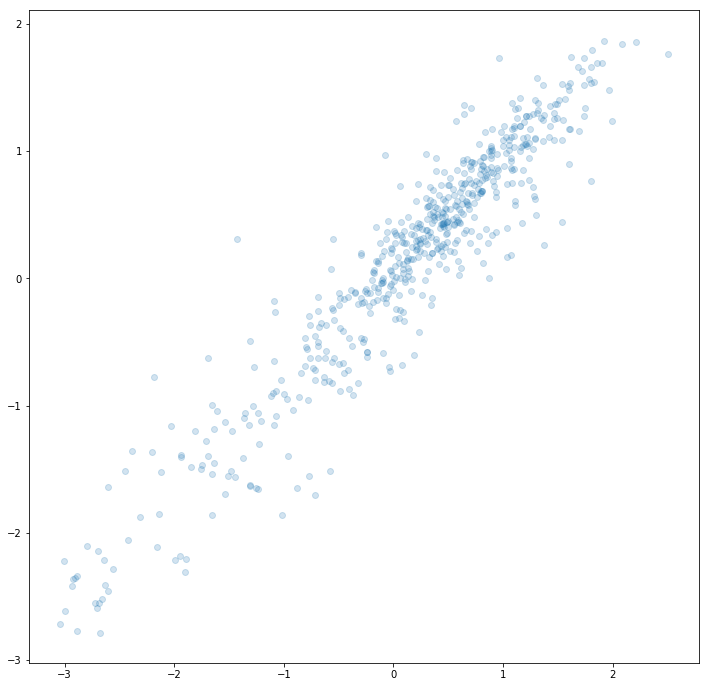

In [290]:
prediction = model.predict(xgb.DMatrix(X_test), 
                           ntree_limit=model.best_ntree_limit)

plt.figure(figsize=(12, 12))
plt.scatter(y_test[:3000], prediction[:3000], alpha=0.2)
plt.show()

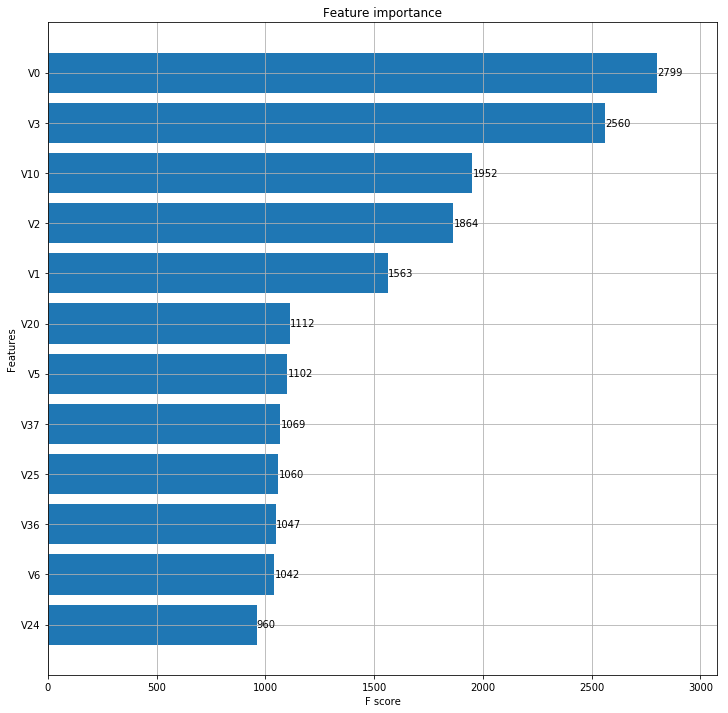

In [291]:

fig, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(model, max_num_features=12, height=0.8, ax=ax)
plt.show()

In [292]:
#np.savetxt('prediction.txt',prediction)

In [293]:
from sklearn.metrics import mean_squared_error 
xgb_score=mean_squared_error(y_test,prediction)
print(xgb_score)

0.11702033433787323


In [294]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def predict(self, x):
        return self.clf.predict(x) 
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)
    #def score(self,x,y):
     #   return mean_squared_error(x,y)
rfc_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True, 
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1
}

etc_params = {
    'n_jobs': -1,
    'n_estimators':500,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 1
}

ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

gbc_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 1
}

In [295]:
rfc = SklearnHelper(clf=RandomForestRegressor, seed=0, params=rfc_params).fit(X_train, y_train)
etc = SklearnHelper(clf=ExtraTreesRegressor, seed=0, params=etc_params).fit(X_train, y_train)
ada = SklearnHelper(clf=AdaBoostRegressor, seed=0, params=ada_params).fit(X_train, y_train)
gbc = SklearnHelper(clf=GradientBoostingRegressor, seed=0, params=gbc_params).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished


      Iter       Train Loss   Remaining Time 
         1           0.7807            9.98s
         2           0.6572           12.38s
         3           0.5565           11.60s
         4           0.4738           11.30s
         5           0.4056           10.87s
         6           0.3496           11.88s
         7           0.3033           11.96s
         8           0.2654           11.77s
         9           0.2336           11.62s
        10           0.2072           12.23s
        20           0.0905           10.41s
        30           0.0616            9.30s
        40           0.0481            8.09s
        50           0.0412            7.27s
        60           0.0359            6.70s
        70           0.0318            6.14s
        80           0.0285            5.80s
        90           0.0260            5.44s
       100           0.0238            5.16s
       200           0.0092            3.28s
       300           0.0034            2.25s
       40

In [296]:
etc_pred = rfc.predict(X_test)
etc_pred = etc.predict(X_test)
ada_pred = ada.predict(X_test)
gbc_pred = gbc.predict(X_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


In [297]:
rfc_score = mean_squared_error(y_test,rfc_pred)
etc_score = mean_squared_error(y_test,etc_pred)
ada_score = mean_squared_error(y_test,ada_pred)
gbc_score = mean_squared_error(y_test,gbc_pred)
print(xgb_score)
print(rfc_score )
print(etc_score)
print(ada_score )
print(gbc_score )

0.11702033433787323
1.8200775844578665
0.12696886545784694
0.161506971865176
0.11072775806245679


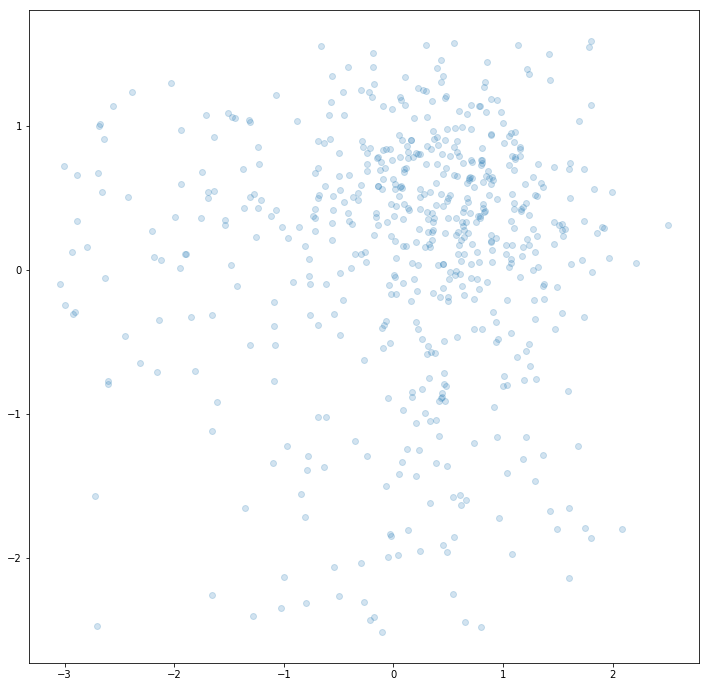

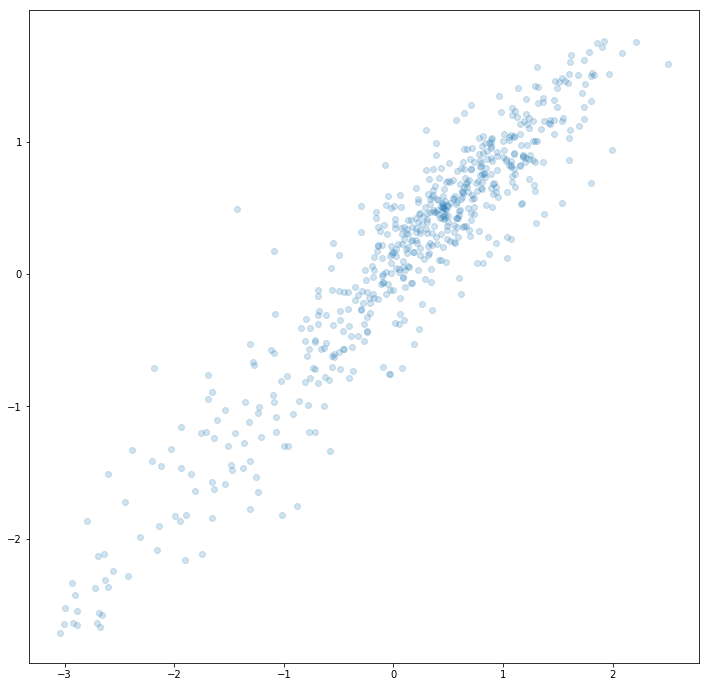

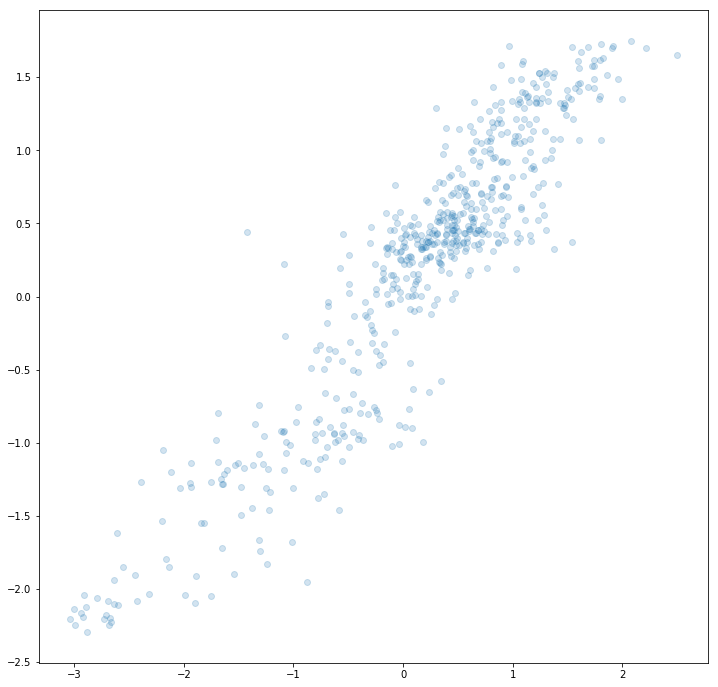

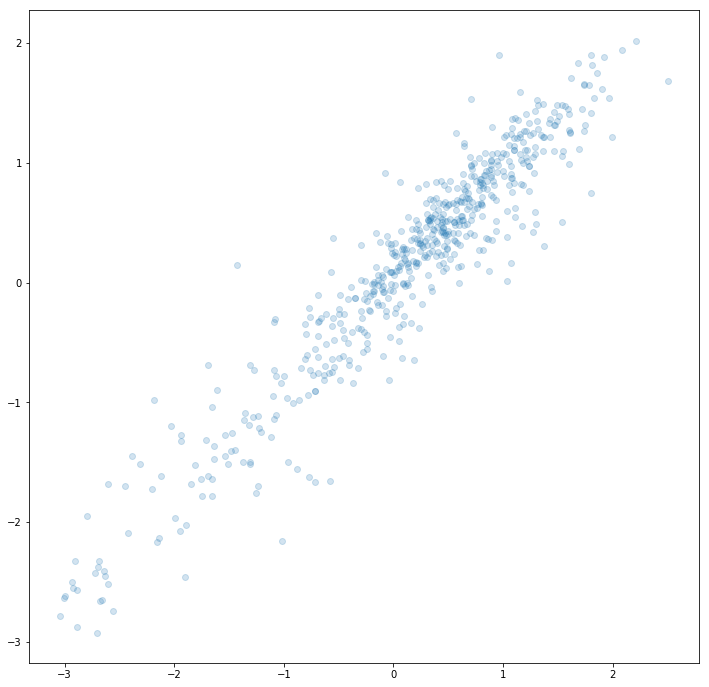

In [298]:
plt.figure(figsize=(12, 12))
plt.scatter(y_test[:3000],rfc_pred[:3000], alpha=0.2)
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(y_test[:3000],etc_pred[:3000], alpha=0.2)
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(y_test[:3000],ada_pred[:3000], alpha=0.2)
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(y_test[:3000],gbc_pred[:3000], alpha=0.2)
plt.show()

In [299]:
sub_data=train_data=pd.read_table("zhengqi_test.txt",sep="\t")
sub_data.head()
sub_data=pd.DataFrame(sub_data)
#sub_data
#sub_data=sub_data.values
type(sub_data)


pandas.core.frame.DataFrame

In [300]:
sub_data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497
5,0.050,0.340,0.108,0.051,-0.348,0.074,0.516,0.491,0.238,0.904,...,-0.450,-0.897,0.536,0.447,0.370,-0.040,-0.290,0.008,-0.228,0.169
6,-0.223,0.175,-0.390,0.051,0.006,0.134,0.497,0.548,-0.099,0.904,...,-0.452,-0.937,0.249,0.432,0.494,-0.040,-0.290,0.008,0.104,1.077
7,-0.126,0.152,0.227,0.021,-0.619,-0.069,0.520,0.548,0.060,0.904,...,-0.452,-0.950,1.256,0.281,0.555,-0.040,-0.290,0.008,-0.700,-0.498
8,-0.203,-0.014,0.010,-0.034,-0.322,0.105,0.453,0.518,-0.032,0.473,...,-0.450,-0.950,0.078,0.222,0.245,-0.040,-0.290,0.008,-0.236,-0.149
9,-0.181,0.797,0.470,-0.107,-0.477,0.184,0.588,0.528,0.319,0.904,...,-0.446,-1.092,-0.131,0.466,0.430,-0.040,-0.290,-0.289,-0.431,-0.271


In [301]:
sub_pred_xgb = model.predict(xgb.DMatrix(sub_data), ntree_limit=model.best_ntree_limit)
print(sub_pred_xgb)

[ 0.3696367  0.2256209 -0.0136078 ... -2.3381796 -2.3824856 -2.3191197]


In [302]:
sub_pred_rfc=rfc.predict(sub_data)
print(sub_pred_rfc)

[ 0.29742974  0.23663469 -0.01431516 ... -2.3061471  -2.3842972
 -2.33997281]


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


In [303]:
sub_pred_etc=etc.predict(sub_data)
print(sub_pred)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


[ 0.25604967  0.2325088   0.1307931  ... -2.22425346 -2.22559102
 -2.18680941]


In [304]:
sub_pred_gbc=gbc.predict(sub_data)
print(sub_pred_gbc)

[ 0.44189783  0.34467142  0.09725955 ... -2.01643833 -2.13625823
 -2.14295943]


In [305]:
sub_pred_ada=ada.predict(sub_data)
print(sub_pred_ada)

[ 0.37605949  0.34106395  0.14095337 ... -2.19763495 -2.23234018
 -2.09509974]


In [306]:
np.savetxt('prediction.txt',sub_pred_xgb)